# Курс "Python для анализа данных"

---
# Домашнее задание PRO
#6.3 Статистический анализ данных, получение корреляционных значений и отбор значимых признаков

In [1]:
# Запустите код ниже для старта, но не правьте во избежания ошибок проверки!
_HOMEWORK_NAME_ = '6.3_PRO'
_HOMEWORK_ANSWER_DICT_ = dict()

## ФИО участника

In [2]:
# Введите ваше имя и фамилию в соответствующую позицию 'NAME' и 'LAST_NAME'!
_NAME_SERNAME_ = {
    'NAME' : 'Vladimir',
    'LAST_NAME' : 'Doronin'
}

## Задание 1

**Условие:** 
Для предобработанного датасета ```house_train.csv``` из домашнего задания ```6.2``` постройте графики зависимостей целевой переменной от остальных признаков. Сделайте выводы по результатам анализа полученных графиков.

**Оценка в баллах:** 3 балла

**Решение:**

In [3]:
import pandas as pd
import numpy as np

# разумнее было бы импортировать новый csv, но это пришлось бы весь код заново запускать, проще стало скопировать код =)
url = 'https://raw.githubusercontent.com/rohan-varma/house-predict-nn/master/data/house_train.csv'
df1 = pd.read_csv(url)

for col in df1.columns:
  if df1[col].isnull().sum() > 730:
    df1 = df1.drop([col], axis=1)
  elif df1[col].isnull().sum() > 0:
    if df1[col].dtypes == object:
      df1[col] = df1[col].fillna(df1[col].value_counts().argmax())
    else:
      df1[col] = df1[col].fillna(df1[col].mean())

df1.index = df1.Id
df1.drop(['Id'], axis=1, inplace=True)

for col in df1.columns:
  if df1[col].dtypes == object:
    for value in df1[col].unique():
      if df1[df1[col] == value].shape[0] < 30:
        df1[col] = df1[col].replace(value, df1[col].value_counts().argmax())
  # Данный подход не учитывает, что могут быть категориальные признаки, которые разбиты еще более, чем по 30 элементов, но опустим это
  else:
    mean = df1[col].mean()
    board1 = df1[col].mean() + df1[col].std() * 3
    board2 = df1[col].mean() - df1[col].std() * 3
    df1[col] = df1[col].map(lambda x: mean if x > board1 else x)
    df1[col] = df1[col].map(lambda x: mean if x < board2 else x)

In [4]:
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.000000,2003.0,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.000000,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.000000,2,1.0,3.0,1.0,Gd,8.0,Typ,0.0,0,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,0.000000,61.0,0.00000,0.0,0.0,0.0,0.000000,2,2008,WD,Normal,208500.0
2,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,0,Feedr,Norm,1Fam,1Story,6.0,8.000000,1976.0,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.000000,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,0.057534,2,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,5,2007,WD,Normal,181500.0
3,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.000000,2001.0,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.000000,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.000000,2,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,0.000000,42.0,0.00000,0.0,0.0,0.0,0.000000,9,2008,WD,Normal,223500.0
4,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.000000,1915.0,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.000000,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.000000,1,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,0.000000,35.0,21.95411,0.0,0.0,0.0,0.000000,2,2006,WD,Abnorml,140000.0
5,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.000000,2000.0,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.000000,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.000000,2,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192.000000,84.0,0.00000,0.0,0.0,0.0,0.000000,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,5.000000,1999.0,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.000000,953.0,953.0,GasA,Ex,Y,SBrkr,953.0,694.0,0.0,1647.0,0.0,0.000000,2,1.0,3.0,1.0,TA,7.0,Typ,1.0,TA,Attchd,1999.0,RFn,2,460.0,TA,TA,Y,0.000000,40.0,0.00000,0.0,0.0,0.0,0.000000,8,2007,WD,Normal,175000.0
1457,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6.0,6.000000,1978.0,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.000000,589.0,1542.0,GasA,TA,Y,SBrkr,2073.0,0.0,0.0,2073.0,1.0,0.000000,2,0.0,3.0,1.0,TA,7.0,Min1,2.0,TA,Attchd,1978.0,Unf,2,500.0,TA,TA,Y,349.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,2,2010,WD,Normal,210000.0
1458,70.0,RL,66.0,9042.0,Pave,Reg

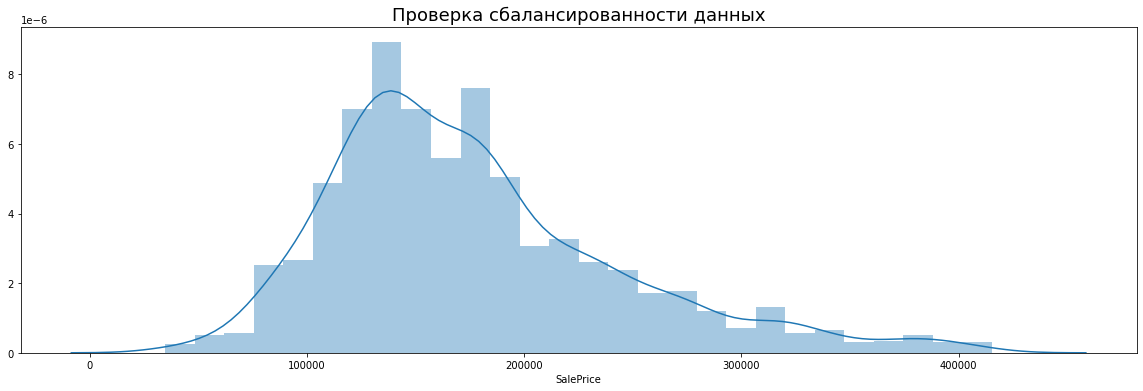

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
plt.title('Проверка сбалансированности данных', fontsize=18)
sns.distplot(df1['SalePrice'])

Не очень то равномерно)) Есть смещение в сторону дорогих домов, что логично) 
Не уверен, что тут нужно балансировать, но для баланса мы могли бы создать новые обьекты дорогих домов по схожим признакам или скопировать те что есть.

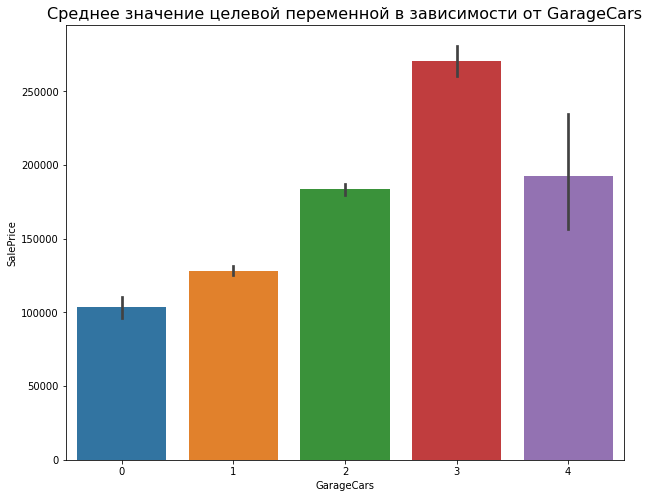

In [8]:
plt.figure(figsize=(10,8))
plt.title('Среднее значение целевой переменной в зависимости от GarageCars', fontsize=16)
sns.barplot(x='GarageCars', y='SalePrice', data=df1)

Рост логичен, а вот падение при четырех местах удивительно. Нужно анализировать причины, но там компенсирующий фактор - особенно большой разброс.

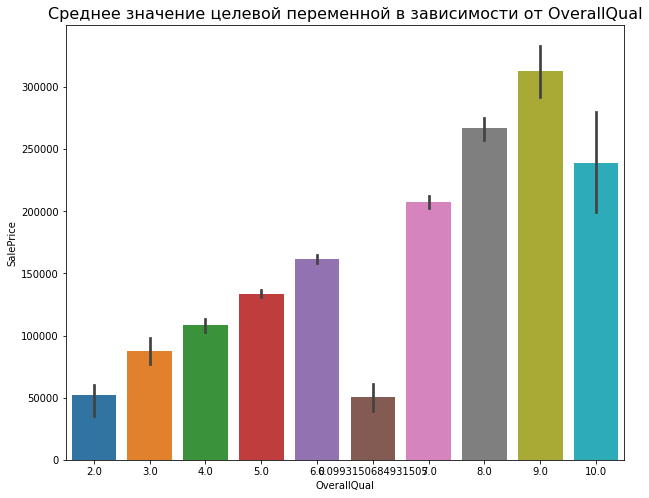

In [10]:
plt.figure(figsize=(10,8))
plt.title('Среднее значение целевой переменной в зависимости от OverallQual', fontsize=16)
sns.barplot(x='OverallQual', y='SalePrice', data=df1)

Тут все логично. Странности связаны с нашим устранением выбросов. По хорошему их стоило бы откатить назад или переделать. Я бы скорее откатил.

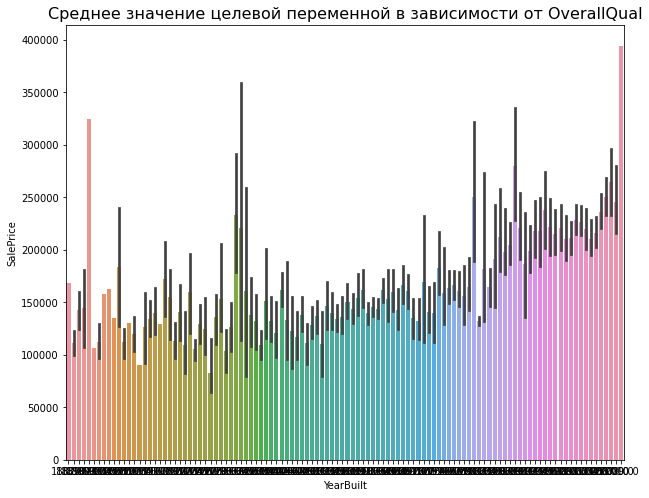

In [11]:
plt.figure(figsize=(10,8))
plt.title('Среднее значение целевой переменной в зависимости от OverallQual', fontsize=16)
sns.barplot(x='YearBuilt', y='SalePrice', data=df1)

Мы таки можем заметить постепенное увеличение цены, чем новее дом. Что опять же логично. Интересно какой резкий скачок у абсолютно новых домов.

## Задание 2

**Условие:** 
Для датасета из задания 1 постройте тепловую карту из попарных корреляционных значений.  Сделайте выводы по результатам анализа.

**Оценка в баллах:** 3 балла

**Решение:**

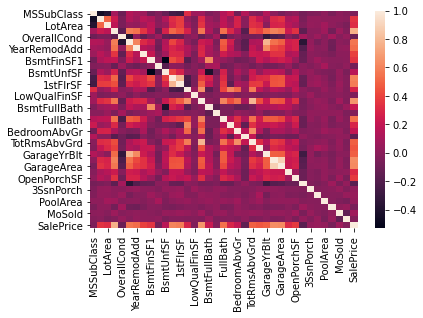

In [12]:
plt.figure()
sns.heatmap(df1.corr())

Главный вывод - я бы тут пользовался просто таблицей. Но тем не менее смотрим светлые квадратики - это максимальная корреляция. Ессно кроме тех, что на диагонали. Там где черно - наоборот корреляции нету) Все просто. Так мелко, что линеечку бы взять чтоли? =))

## Задание 3

**Условие:** 
Постройте любые дополнительные графики на ваше усмотрение. Сделайте выводы по результатам их анализа. 

**Оценка в баллах:** 3 балла

**Решение:**

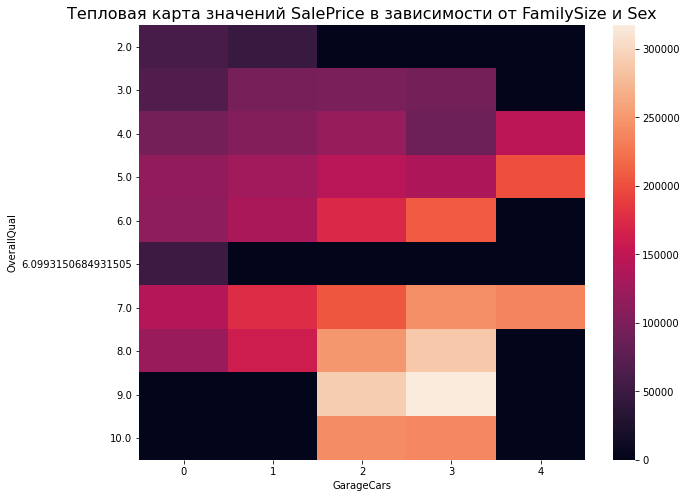

In [18]:
plt.figure(figsize=(10,8))
plt.title('Тепловая карта значений SalePrice в зависимости от FamilySize и Sex', fontsize=16)
sns.heatmap(df1.groupby(['OverallQual','GarageCars'])['SalePrice'].mean().unstack().fillna(0))

Если исключить нашу кривую строчку 6.09 - то зависимость прямая, чем ниже и правее - тем выше цена. Черные пятна - это отсутствие данных.

## Комментарии участника

In [19]:
_YOUR_COMMENT_ = 'All right!'

## Создание отчета

In [20]:
# Проверьте правильность заполнения полей и 
# выполните данный код для создания отчета
# и сохранения на локальную машину
from google.colab import files
import json
try:
  # form a report
  _HM_REPORT_ = {'Answers':_HOMEWORK_ANSWER_DICT_,
                'Comment':_YOUR_COMMENT_,
                'User':_NAME_SERNAME_,
                }

  # create a report name
  _REPORT_NAME_ = 'HM_' +\
                    _HOMEWORK_NAME_ + \
                  '_by_' + \
                  _NAME_SERNAME_['LAST_NAME'] + \
                  '.json'
  
  # Save a report to a file
  f = open(_REPORT_NAME_,"w")
  f.write(json.dumps(_HM_REPORT_))
  f.close()

  # Donwnload the file into a local host
  files.download(_REPORT_NAME_) 
  print('Thanks for the work, {name}!'.format(name=_NAME_SERNAME_['NAME']))
except Exception as error:
   print(error)
   print('Something went wrong! Check the data entry and try again!')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Thanks for the work, Vladimir!
